# `ANALISIS EXPLORATORIO DE DATOS (EDA)`
A traves del siguiente analisis exploratorio, intentaremos encontrar patrones o tendencias los cuales nos den un mejor paneo general de nuestra data.

#### Importamos librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import warnings
warnings.filterwarnings("ignore")

#### Cargamos los datasets a analizar

In [3]:
taxis = pd.read_csv("Informacion de taxis.csv")

In [4]:
#Eliminamos las columas que no vamos a usar
taxis.drop(columns=['Unnamed: 0', 'barrels08', 'highway08', 'UHighway'], inplace=True)

In [5]:
#Renombramos las columnas para mejor comprension 
taxis.rename(columns={'comb08': 'm_x_g','feScore': 'ef_x_comb', 'fuelCost08':'comb_x_year','ghgScore':'score_ghg',
                      'UCity': 'ef_x_comb_city'}, inplace=True)

In [6]:
'''
DICCIONARIO DE DATOS
Year: año de fabricación
Manufacturer: nombre del fabricante o la marca del vehículo. 
co2: emisiones de dióxido de carbono
m_x_g: consumo de combustible en millas por galón
ef_x_comb: puntuación de eficiencia de combustible del vehículo
comb_x_year: gasto estimado de combustible por año
fuelType:  tipo de combustible utilizado por el vehículo
score_ghg:  Representa la puntuación de emisiones de gases de efecto invernadero del vehículo. Cuanto mayor sea la puntuación, menor será el impacto ambiental en términos de emisiones de gases de efecto invernadero.
ef_x_comb_city: Representan la eficiencia de combustible en condiciones de conducción en la ciudad.
youSaveSpend: Indica cuánto se puede ahorrar o gastar en combustible en comparación con un vehículo promedio.
createdOn: Indican la fecha de creación de los registros en el conjunto de datos.
modifiedOn: Indican la fecha de modificación de los registros en el conjunto de datos.
'''

'\nDICCIONARIO DE DATOS\nYear: año de fabricación\nManufacturer: nombre del fabricante o la marca del vehículo. \nco2: emisiones de dióxido de carbono\nm_x_g: consumo de combustible en millas por galón\nef_x_comb: puntuación de eficiencia de combustible del vehículo\ncomb_x_year: gasto estimado de combustible por año\nfuelType:  tipo de combustible utilizado por el vehículo\nscore_ghg:  Representa la puntuación de emisiones de gases de efecto invernadero del vehículo. Cuanto mayor sea la puntuación, menor será el impacto ambiental en términos de emisiones de gases de efecto invernadero.\nef_x_comb_city: Representan la eficiencia de combustible en condiciones de conducción en la ciudad.\nyouSaveSpend: Indica cuánto se puede ahorrar o gastar en combustible en comparación con un vehículo promedio.\ncreatedOn: Indican la fecha de creación de los registros en el conjunto de datos.\nmodifiedOn: Indican la fecha de modificación de los registros en el conjunto de datos.\n'

In [7]:
taxis

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
0,2017,BMW,519.0,17.0,3.0,3850.0,Premium,3.0,17.9989,-9750.0,04-04-2016,09-09-2016
1,2017,BMW,374.0,24.0,5.0,2700.0,Premium,5.0,26.7866,-4000.0,04-04-2016,22-11-2016
2,2016,Infiniti,402.0,22.0,5.0,2950.0,Premium,5.0,25.1000,-5250.0,04-04-2016,26-09-2016
3,2017,MINI,327.0,27.0,6.0,2400.0,Premium,6.0,30.8534,-2500.0,12-04-2016,16-09-2016
4,2017,Kia,433.0,21.0,4.0,2550.0,Regular,4.0,22.8000,-3250.0,12-04-2016,02-12-2016
...,...,...,...,...,...,...,...,...,...,...,...,...
46181,1993,Plymouth,-1.0,23.0,-1.0,2300.0,Regular,-1.0,26.0000,-2000.0,01-01-2013,01-01-2013
46182,1993,Pontiac,-1.0,21.0,-1.0,2550.0,Regular,-1.0,22.0000,-3250.0,01-01-2013,01-01-2013
46183,1993,Saab,-1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46184,1993,Subaru,-1.0,22.0,-1.0,2400.0,Regular,-1.0,24.0000,-2500.0,01-01-2013,01-01-2013


#### Chequeamos valores nulos

In [180]:
#Contamos cuantos nulos hay por columna
taxis.isnull().sum()

Year                 0
Manufacturer         0
co2                 17
m_x_g               17
ef_x_comb         1233
comb_x_year       1233
fuelType          1233
score_ghg         1233
ef_x_comb_city    1994
youSaveSpend      1994
createdOn         2016
modifiedOn        2016
dtype: int64

Encontramos que a pesar de tener datos faltantes, no son determinantes de nuestro analisis asi que simplemente los conservamos, ya que en otras columnas debemos mantener los datos que si estan en el mismo

In [181]:
#Observamos los tipos de datos del df
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            46186 non-null  int64  
 1   Manufacturer    46186 non-null  object 
 2   co2             46169 non-null  float64
 3   m_x_g           46169 non-null  float64
 4   ef_x_comb       44953 non-null  float64
 5   comb_x_year     44953 non-null  float64
 6   fuelType        44953 non-null  object 
 7   score_ghg       44953 non-null  float64
 8   ef_x_comb_city  44192 non-null  float64
 9   youSaveSpend    44192 non-null  float64
 10  createdOn       44170 non-null  object 
 11  modifiedOn      44170 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 4.2+ MB


# Duplicados

In [182]:
# Buscamos filas con valores duplicados
duplicados = taxis[taxis.duplicated()] 
duplicados

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
21,1987,GMC,-1.0,15.0,-1.0,3550.0,Regular,-1.0,17.0,-8250.0,01-01-2013,01-01-2013
24,1987,GMC,-1.0,15.0,-1.0,3550.0,Regular,-1.0,17.0,-8250.0,01-01-2013,01-01-2013
48,2017,Ford,370.0,24.0,5.0,2200.0,Regular,5.0,28.0,-1500.0,24-06-2016,02-12-2016
148,1987,Dodge,-1.0,11.0,-1.0,4850.0,Regular,-1.0,12.0,-14750.0,01-01-2013,01-01-2013
169,1987,Ford,-1.0,14.0,-1.0,3800.0,Regular,-1.0,15.0,-9500.0,01-01-2013,01-01-2013
...,...,...,...,...,...,...,...,...,...,...,...,...
46181,1993,Plymouth,-1.0,23.0,-1.0,2300.0,Regular,-1.0,26.0,-2000.0,01-01-2013,01-01-2013
46182,1993,Pontiac,-1.0,21.0,-1.0,2550.0,Regular,-1.0,22.0,-3250.0,01-01-2013,01-01-2013
46183,1993,Saab,-1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46184,1993,Subaru,-1.0,22.0,-1.0,2400.0,Regular,-1.0,24.0,-2500.0,01-01-2013,01-01-2013


In [183]:
#Eliminamos los duplicados
taxis = taxis.drop_duplicates()

In [185]:
# Calculamos el promedio de la columna "co2" sin contar los valores -1
promedio_co2 = taxis[taxis['co2'] != -1]['co2'].mean()
promedio_co2 = round(promedio_co2,2)
promedio_co2

388.37

In [199]:
# Reemplazamos los valores -1 por el promedio
taxis['co2'] = taxis['co2'].replace(-1, promedio_co2)
taxis['co2'] = taxis['co2'].replace(0, promedio_co2)
taxis

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
0,2017,BMW,519.00,17.0,3.0,3850.0,Premium,3.0,17.9989,-9750.0,04-04-2016,09-09-2016
1,2017,BMW,374.00,24.0,5.0,2700.0,Premium,5.0,26.7866,-4000.0,04-04-2016,22-11-2016
2,2016,Infiniti,402.00,22.0,5.0,2950.0,Premium,5.0,25.1000,-5250.0,04-04-2016,26-09-2016
3,2017,MINI,327.00,27.0,6.0,2400.0,Premium,6.0,30.8534,-2500.0,12-04-2016,16-09-2016
4,2017,Kia,433.00,21.0,4.0,2550.0,Regular,4.0,22.8000,-3250.0,12-04-2016,02-12-2016
...,...,...,...,...,...,...,...,...,...,...,...,...
46164,1993,Toyota,388.37,25.0,-1.0,2100.0,Regular,-1.0,28.0000,-1000.0,01-01-2013,01-01-2013
46172,1993,Hyundai,388.37,21.0,-1.0,2550.0,Regular,-1.0,23.3333,-3250.0,01-01-2013,01-01-2013
46173,1993,Mercury,388.37,23.0,-1.0,2300.0,Regular,-1.0,26.0000,-2000.0,01-01-2013,01-01-2013
46176,1993,Mercedes-Benz,388.37,18.0,-1.0,3650.0,Premium,-1.0,20.0000,-8750.0,01-01-2013,01-01-2013


# OUTLIERS

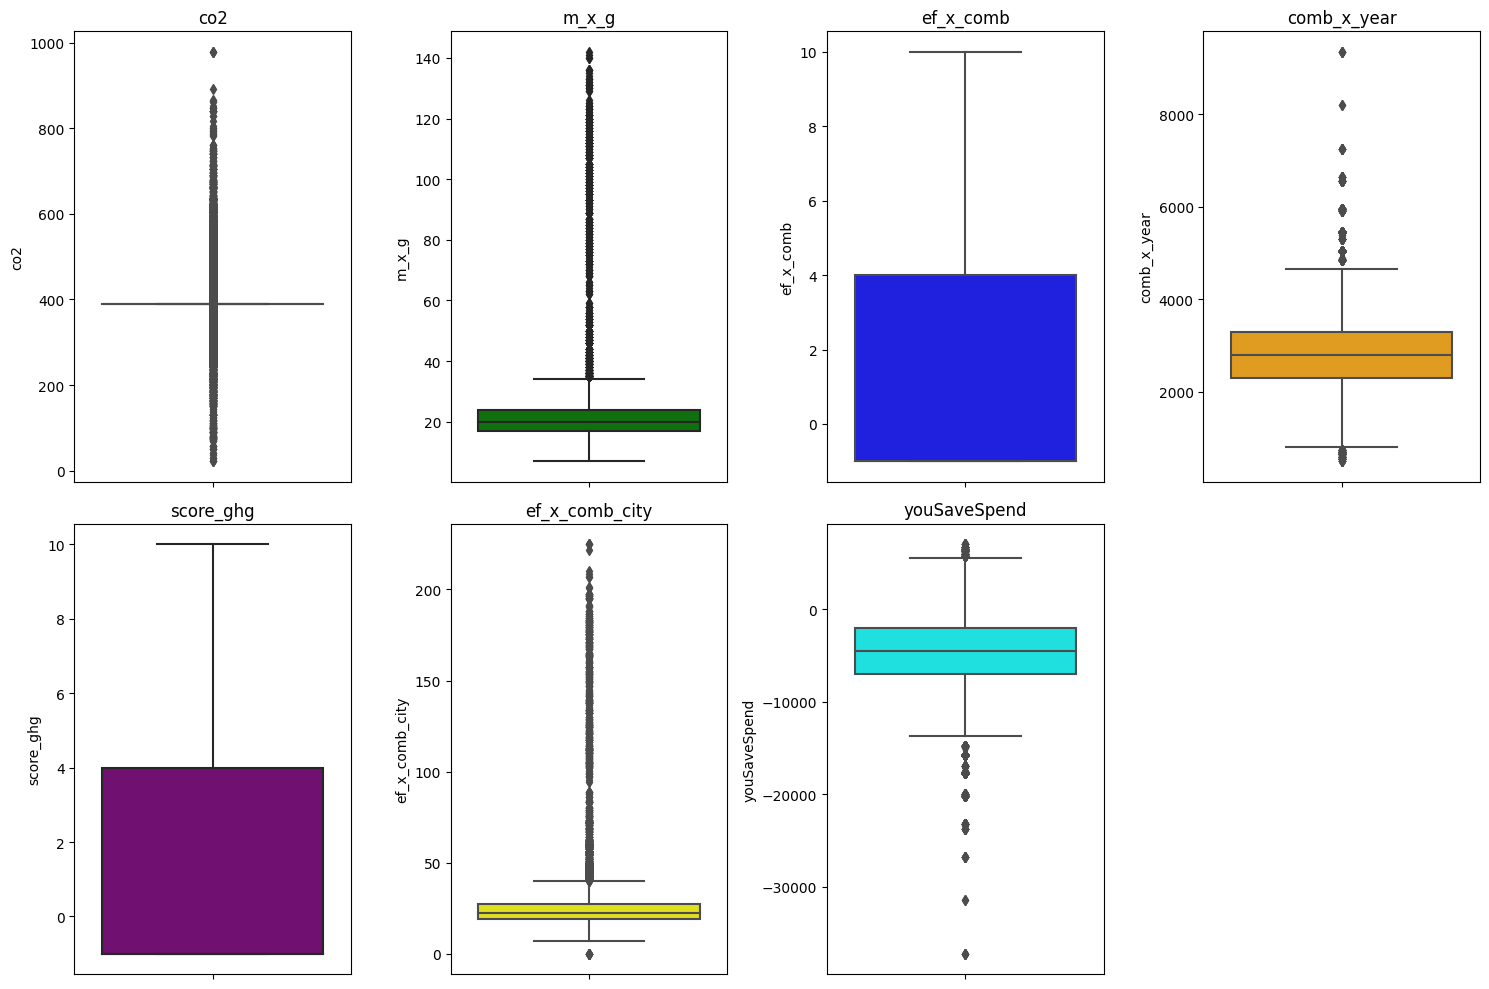

In [187]:
#Graficamos outliers
columnas = ['co2', 'm_x_g', 'ef_x_comb', 'comb_x_year', 'score_ghg', 'ef_x_comb_city', 'youSaveSpend']
	

colores = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columnas):
    plt.subplot(2, 4, i+1)  
    sns.boxplot(y=taxis[column], color=colores[i])
    plt.title(column)

plt.tight_layout()
plt.show()

In [188]:
taxis[taxis['co2'] < 50]

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
9753,2018,BMW,29.0,35.0,10.0,1850.0,Premium Gas or Electricity,10.0,48.6702,5500.0,11-01-2018,25-03-2022
10056,2019,BMW,22.0,31.0,10.0,2100.0,Premium Gas or Electricity,10.0,44.7000,5500.0,06-02-2019,25-03-2022
10369,2020,BMW,22.0,31.0,10.0,2100.0,Premium Gas or Electricity,10.0,44.7000,5500.0,14-04-2020,25-03-2022
13173,2016,BMW,37.0,39.0,10.0,1700.0,Premium Gas or Electricity,10.0,52.1000,5500.0,13-01-2016,25-03-2022
27800,2017,BMW,29.0,35.0,10.0,1850.0,Premium Gas or Electricity,10.0,49.2000,5500.0,26-09-2016,25-03-2022
31163,2014,BMW,40.0,39.0,10.0,1700.0,Premium Gas or Electricity,10.0,52.5000,5500.0,17-07-2014,25-03-2022
31325,2015,BMW,40.0,39.0,10.0,1700.0,Premium Gas or Electricity,10.0,52.5000,5500.0,18-02-2015,25-03-2022
38355,2021,BMW,22.0,31.0,10.0,2100.0,Premium Gas or Electricity,10.0,44.7000,5500.0,24-02-2021,10-05-2023


In [206]:
taxis[taxis['co2'] > 850]

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
1582,2022,Bugatti,979.0,9.0,1.0,7250.0,Premium,1.0,9.3000,-26750.0,24-09-2021,10-05-2022
11113,2023,Bugatti,979.0,9.0,1.0,7250.0,Premium,1.0,9.3000,-26750.0,20-09-2022,20-09-2022
21511,2020,Bugatti,864.0,10.0,1.0,6550.0,Premium,1.0,10.4000,-23250.0,05-05-2020,12-05-2020
21717,2020,Lamborghini,861.0,10.0,1.0,6550.0,Premium,1.0,10.0492,-23250.0,26-10-2020,26-10-2020
21729,2021,Bugatti,893.0,10.0,1.0,6550.0,Premium,1.0,10.1013,-23250.0,11-11-2020,26-07-2021
21730,2021,Lamborghini,852.0,10.0,1.0,6550.0,Premium,1.0,10.0221,-23250.0,11-11-2020,03-08-2021
21947,2022,Bugatti,979.0,9.0,1.0,7250.0,Premium,1.0,9.3000,-26750.0,24-09-2021,04-10-2021
38359,2021,Lamborghini,867.0,10.0,1.0,6550.0,Premium,1.0,9.9990,-23250.0,03-03-2021,03-08-2021


In [190]:
taxis[taxis['m_x_g'] > 135]

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
239,2017,Hyundai,388.37,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,16-11-2016,28-11-2017
684,2019,Hyundai,388.37,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,12-07-2018,02-02-2022
1433,2021,Tesla,388.37,142.0,10.0,500.0,Electricity,10.0,201.2,7000.0,24-03-2021,06-04-2021
11217,2023,Lucid,388.37,140.0,10.0,500.0,Electricity,10.0,187.4,7000.0,12-12-2022,17-02-2023
28128,2018,Hyundai,388.37,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,23-10-2017,02-02-2022
38009,2020,Tesla,388.37,141.0,10.0,500.0,Electricity,10.0,210.4,7000.0,05-11-2019,02-02-2022
44948,2023,Hyundai,388.37,140.0,10.0,500.0,Electricity,10.0,208.6,7000.0,17-05-2023,17-05-2023


In [191]:
taxis[taxis['ef_x_comb_city'] > 210]

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
239,2017,Hyundai,388.37,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,16-11-2016,28-11-2017
684,2019,Hyundai,388.37,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,12-07-2018,02-02-2022
26425,2023,Hyundai,388.37,135.0,10.0,500.0,Electricity,10.0,221.5,7000.0,17-05-2023,17-05-2023
28128,2018,Hyundai,388.37,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,23-10-2017,02-02-2022
38009,2020,Tesla,388.37,141.0,10.0,500.0,Electricity,10.0,210.4,7000.0,05-11-2019,02-02-2022


In [192]:
taxis[taxis['youSaveSpend'] < -27000]

,Year,Manufacturer,co2,m_x_g,ef_x_comb,comb_x_year,fuelType,score_ghg,ef_x_comb_city,youSaveSpend,createdOn,modifiedOn
914,1988,Lamborghini,388.37,7.0,-1.0,9350.0,Premium,-1.0,7.0000,-37250.0,01-01-2013,01-01-2013
6357,1995,Ferrari,388.37,8.0,-1.0,8200.0,Premium,-1.0,8.8889,-31500.0,01-01-2013,01-01-2013
11445,1987,Lamborghini,388.37,7.0,-1.0,9350.0,Premium,-1.0,7.0000,-37250.0,01-01-2013,01-01-2013
14777,1986,Lamborghini,388.37,7.0,-1.0,9350.0,Premium,-1.0,7.0000,-37250.0,01-01-2013,01-01-2013
26562,1989,Lamborghini,388.37,7.0,-1.0,9350.0,Premium,-1.0,7.0000,-37250.0,01-01-2013,01-01-2013
35499,2003,Ferrari,388.37,8.0,-1.0,8200.0,Premium,-1.0,8.4473,-31500.0,01-01-2013,01-01-2013
45351,1990,Lamborghini,388.37,7.0,-1.0,9350.0,Premium,-1.0,7.0000,-37250.0,01-01-2013,01-01-2013


Observamos los datos de los outliers mas significativos.
Llegamos a la conclusion de que tanto en el consumo de combustible de millas por galon y en la eficiencia de combustible en la ciudad los autos electricos tienen altos valores debido a que son mas eficientes que los de combustion interna.

También podemos observar que los autos de alta gama gastan mas combustible en comparacion con un vehículo promedio.

#### Mapa de correlación
Para entender mas en profundidad nuestras variables numericas, creamos un mapa de correlacion en el cual podemos ver relaciones directas entre ellas

<Axes: >

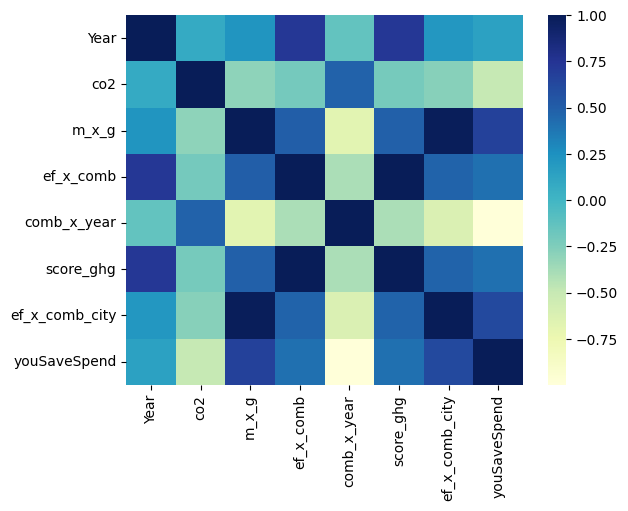

In [193]:
# Filtra solo las columnas numéricas
taxis_numeric = taxis.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = taxis_numeric.corr()

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu")

insights:
- El co2 tiene una buena relacion con respecto al año de creacion del auto, a medida que pasan los años bajan las emisiones de dioxido de carbono por lo que los vehículos mas nuevos emiten mayor contaminación, siempre y cuando los veichulos sean standar o electricos.
- score_ghg almacena la puntuación de emisiones de gases de efecto invernadero (GHG) de un vehículo, que está relacionada con sus emisiones de gases perjudiciales para el medio ambiente. De igual manera, el score sube a medida que subio la cantidad de co2 producido
- El m_x_g Representa el consumo de combustible en millas. Claramente relacionado en el grafico con la eficiencia del vehiculo en consumo de combustible
- El ahorro de o gasto de combustible (youSaveSpend) esta altamente relacionado con la eficiencia de combustible


#### Histograma de frecuencias para los valores

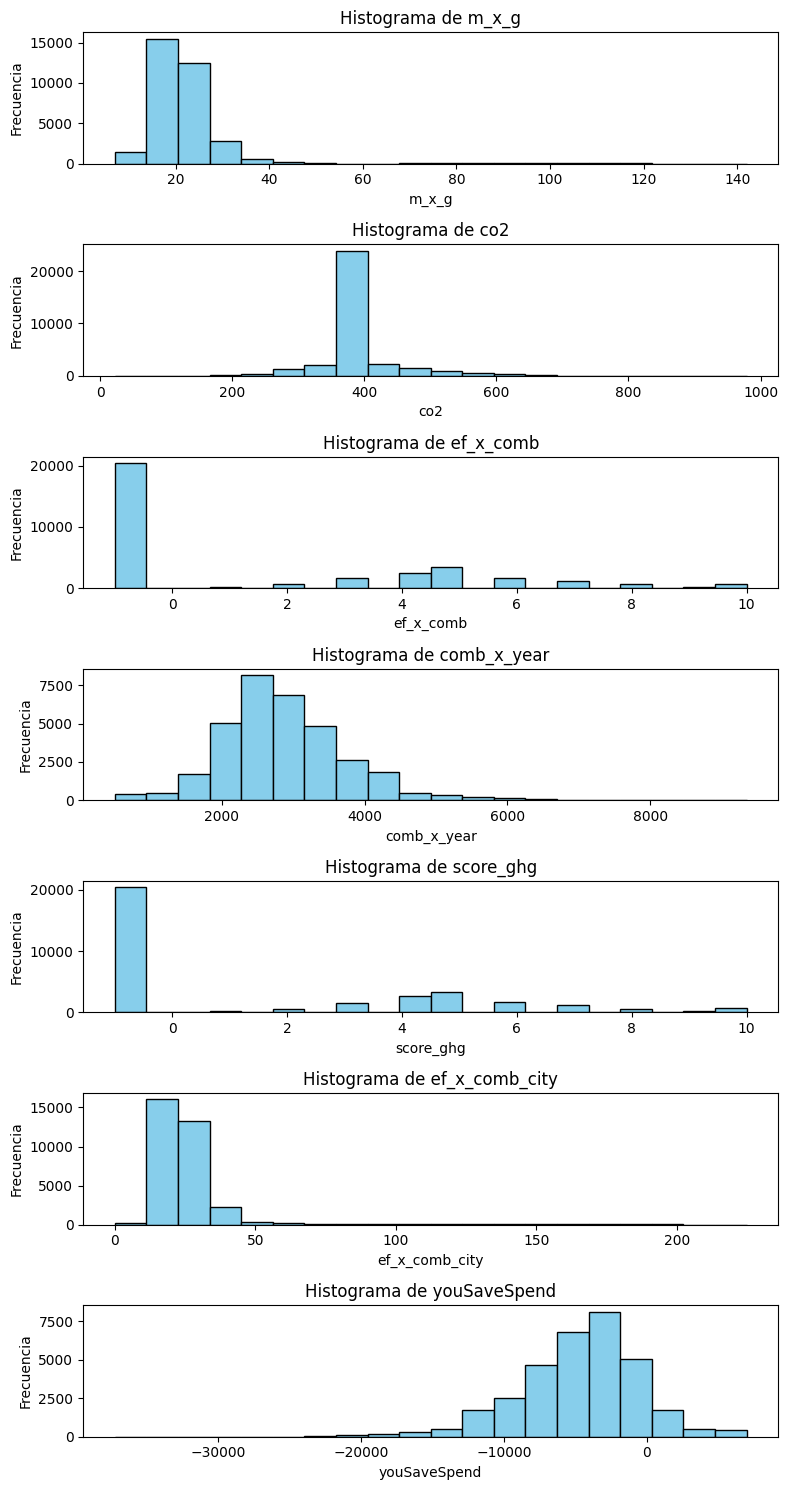

In [194]:
# Lista de variables para crear histogramas
variables = ["m_x_g", "co2", "ef_x_comb", "comb_x_year", "score_ghg", "ef_x_comb_city", "youSaveSpend"]

# Configura la figura con subtramas
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 15))

# Crea histogramas para cada variable
for i, var in enumerate(variables):
    axes[i].hist(taxis[var], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Ajusta el espacio entre subtramas
plt.tight_layout()

# Muestra los histogramas
plt.show()

#### Grafico de Dispersión: Carretera y combustible

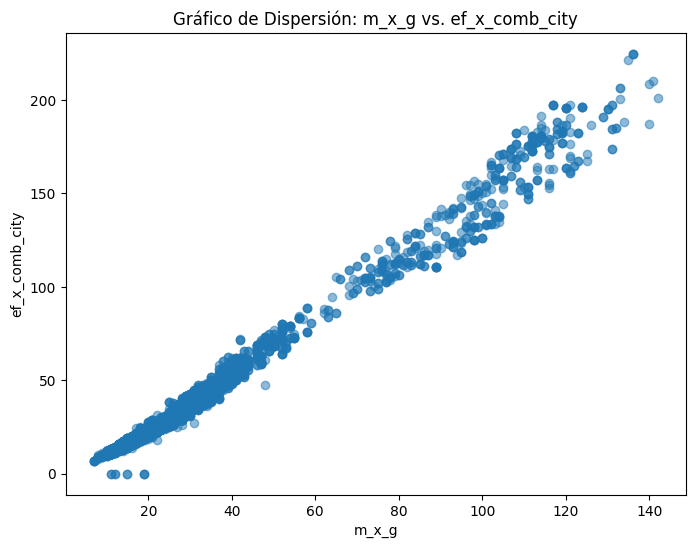

In [196]:
# Variables que queremos comparar
x = "m_x_g"  # Consumo de combustible en ciudad
y = "ef_x_comb_city"  # Consumo de combustible en ciudad

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(taxis[x], taxis[y], alpha=0.5)  # Usamos alpha para dar transparencia a los puntos
plt.title(f'Gráfico de Dispersión: {x} vs. {y}')
plt.xlabel(x)
plt.ylabel(y)

# Muestra el gráfico de dispersión
plt.show()

En este caso, la relación es lineal, lo que significa que existe una relación directa entre la eficiencia de combustible en la ciudad y la cantidad combustible. A medida que aumentan las millas, también aumenta la eficiencia. En este caso, el coeficiente de correlación es positivo y cercano a 1, lo que indica una relación fuerte.

Hay valores altos pero no se observan puntos atípicos que puedan sesgar la relación.

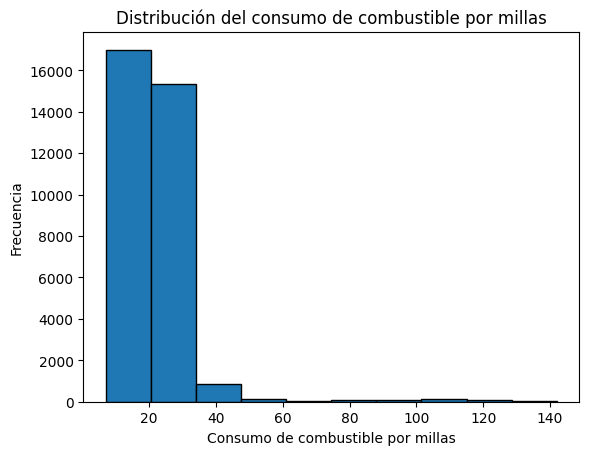

In [197]:
#histograma para analizar la distribución de los valores en la columna "m_x_g" (millas por galon). 

combustible_ciudad = taxis["m_x_g"].dropna()
plt.hist(combustible_ciudad, bins=10, edgecolor='black') 
plt.xlabel("Consumo de combustible por millas")
plt.ylabel("Frecuencia")
plt.title("Distribución del consumo de combustible por millas")
plt.show()

el consumo de gasolina promedio se encuentra entre 20 y 40. Los valores atípicos pueden deberse a factores como el tipo de vehículo, el estilo de conducción o el tipo de combustible.